<a href="https://colab.research.google.com/github/cristiandarioortegayubro/UNI/blob/main/colab/ad_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/cristiandarioortegayubro/UNI/blob/main/UNI%2039%20Aniversario.jpg?raw=true)

[UNI-DEPEC](https://posgrado.uni.edu.ni)

# **Árbol de decisión**

***Un árbol de decisión es un modelo predictivo formado por reglas binarias (si/no) con las que se consigue repartir observaciones del espacio muestral, en función de sus atributos y predecir así el valor de la variable objetivo, o variable dependiente.***

***Muchos métodos predictivos generan modelos en los que una ecuación se aplica a todo el espacio muestral.***

***Cuando el caso de uso implica múltiples predictores, que iteractúan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las distintas variables. El árbol de decisión engloba un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar esas interacciones.***

## **Activando las librerías necesarias**

In [1]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### ***Para el análisis de datos y el conjunto de datos***

In [3]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

## **Conjunto de datos**

***El conjunto de datos contiene información sobre la venta de sillas infantiles en 400 tiendas distintas. Para cada una de las 400 tiendas se han registrado 11 variables. Se pretende generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas $>$ 8 o bajas $<=$ 8, en función de todas las variables disponibles.***

### ***Obtención de los datos***

In [4]:
sillitas=sm.datasets.get_rdataset("Carseats", "ISLR")

In [5]:
datos=sillitas.data

### ***Información del conjunto de datos***

In [6]:
print(sillitas.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: sales-of-child-car-seats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``,

## ***Análisis Exploratorio de los Datos***

### ***Visualización de las variables***

In [7]:
datos.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### ***Información de las variables***

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### ***Ingeniería de variables***

***Se observa que la variable ventas es una variable continua y el objetivo del estudio es clasificar las tiendas según si venden mucho o poco, por lo tanto se crea una nueva variable con los siguientes valores (0, 1) denominada ventas_altas.***

In [9]:
datos.insert(1, column="ventas_altas", value=np.where(datos.Sales > 8, 1, 0))

In [10]:
datos.head(10)

,Sales,ventas_altas,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,0,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,1,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,0,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,1,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,0,132,110,0,108,124,Medium,76,10,No,No
9,4.69,0,132,113,0,131,124,Medium,76,17,No,Yes


***Ahora se procede a eliminar la variable ventas...***

In [11]:
datos = datos.drop(columns = "Sales")
datos.head(10)

,ventas_altas,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
5,1,124,113,13,501,72,Bad,78,16,No,Yes
6,0,115,105,0,45,108,Medium,71,15,Yes,No
7,1,136,81,15,425,120,Good,67,10,Yes,Yes
8,0,132,110,0,108,124,Medium,76,10,No,No
9,0,132,113,0,131,124,Medium,76,17,No,Yes


## **Configuración del entorno PyCaret**

In [12]:
from pycaret.classification import *

In [13]:
clasificacion = setup(data = datos, 
                      target = "ventas_altas", 
                      session_id=123)

,Description,Value
0,Session id,123
1,Target,ventas_altas
2,Target type,Binary
3,Original data shape,"(400, 11)"
4,Transformed data shape,"(400, 13)"
5,Transformed train set shape,"(279, 13)"
6,Transformed test set shape,"(121, 13)"
7,Ordinal features,2
8,Numeric features,7
9,Categorical features,3


## **Modelo**

In [14]:
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8853,0.0000,0.8333,0.8901,0.8541,0.7601,0.7695,0.1110
lda,Linear Discriminant Analysis,0.8853,0.9559,0.8333,0.8901,0.8541,0.7601,0.7695,0.0770
lr,Logistic Regression,0.8710,0.9522,0.8432,0.8519,0.8419,0.7333,0.7405,1.2110
lightgbm,Light Gradient Boosting Machine,0.8601,0.9196,0.7992,0.8694,0.8181,0.7062,0.7237,0.1790
gbc,Gradient Boosting Classifier,0.8529,0.9330,0.7727,0.8818,0.8055,0.6900,0.7126,0.1610
ada,Ada Boost Classifier,0.8528,0.9252,0.8167,0.8347,0.8194,0.6956,0.7033,0.2910
xgboost,Extreme Gradient Boosting,0.8422,0.9301,0.7894,0.8442,0.7981,0.6705,0.6912,0.4370
catboost,CatBoost Classifier,0.8385,0.9266,0.7447,0.8587,0.7851,0.6579,0.6747,1.7720
rf,Random Forest Classifier,0.8135,0.9109,0.7114,0.8173,0.7519,0.6048,0.6160,0.4690
et,Extra Trees Classifier,0.7955,0.8806,0.6644,0.8040,0.7206,0.5626,0.5739,0.3930


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [15]:
dt = create_model('dt')
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.7754,0.7273,0.7273,0.7273,0.5508,0.5508
1,0.7500,0.7299,0.6364,0.7000,0.6667,0.4674,0.4688
2,0.8214,0.8369,0.9091,0.7143,0.8000,0.6429,0.6581
3,0.8929,0.8797,0.8182,0.9000,0.8571,0.7717,0.7740
4,0.8571,0.8342,0.7273,0.8889,0.8000,0.6906,0.6990
5,0.7500,0.7500,0.7500,0.6923,0.7200,0.4948,0.4961
6,0.8214,0.8125,0.7500,0.8182,0.7826,0.6316,0.6333
7,0.8214,0.8021,0.6667,0.8889,0.7619,0.6237,0.6402
8,0.7500,0.7500,0.7500,0.6923,0.7200,0.4948,0.4961


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


## **Optimizando el modelo**

In [16]:
optimizar_dt = tune_model(dt, optimize="precision")
print(optimizar_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.9465,0.9091,1.0000,0.9524,0.9239,0.9266
1,0.7500,0.8717,0.6364,0.7000,0.6667,0.4674,0.4688
2,0.7857,0.8930,0.9091,0.6667,0.7692,0.5779,0.6022
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.7857,0.7861,0.7273,0.7273,0.7273,0.5508,0.5508
5,0.7500,0.7526,0.8333,0.6667,0.7407,0.5051,0.5168
6,0.7143,0.8411,0.3333,1.0000,0.5000,0.3636,0.4714
7,0.8214,0.8906,0.6667,0.8889,0.7619,0.6237,0.6402
8,0.7143,0.7109,0.7500,0.6429,0.6923,0.4286,0.4330


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


## **Evaluación del modelo**

In [17]:
evaluate_model(optimizar_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Predicción del modelo**

In [18]:
predict_model(optimizar_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7355,0.7620,0.6000,0.7143,0.6522,0.4414,0.4458


,CompPrice,Income,Advertising,Population,Price,ShelveLoc_Bad,ShelveLoc_Medium,ShelveLoc_Good,Age,Education,Urban,US,ventas_altas,prediction_label,prediction_score
279,144.0,63.0,11.0,27.0,117.0,0.0,1.0,0.0,47.0,17.0,1.0,1.0,1,0,0.6429
280,115.0,22.0,0.0,491.0,103.0,0.0,1.0,0.0,64.0,11.0,0.0,0.0,0,0,1.0000
281,139.0,23.0,3.0,37.0,120.0,0.0,1.0,0.0,55.0,11.0,0.0,1.0,0,0,1.0000
282,148.0,51.0,16.0,148.0,150.0,0.0,1.0,0.0,58.0,17.0,0.0,1.0,0,0,0.6000
283,143.0,21.0,5.0,81.0,160.0,0.0,1.0,0.0,67.0,12.0,0.0,1.0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,112.0,80.0,5.0,500.0,128.0,0.0,1.0,0.0,69.0,10.0,1.0,1.0,0,0,1.0000
396,107.0,25.0,0.0,412.0,82.0,1.0,0.0,0.0,36.0,14.0,1.0,0.0,0,0,0.7500
397,137.0,80.0,10.0,24.0,105.0,0.0,0.0,1.0,61.0,15.0,1.0,1.0,1,1,1.0000
398,119.0,26.0,0.0,284.0,89.0,0.0,0.0,1.0,26.0,10.0,1.0,0.0,1,1,0.8000


## ***Comparación de árboles frente a modelos lineales...***

***La superioridad de los métodos basados en árboles de decisión frente a los métodos lineales depende del problema en de negocios. Cuando la relación entre el vector de entrada y la variable objetivo es aproximadamente lineal, un modelo de tipo regresión lineal funciona bien y supera a los árboles de regresión.***

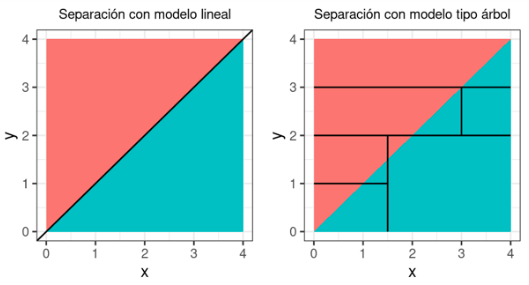

***Por el contrario, si la relación entre el vector de entrada y la variable o objetivo es de tipo no lineal y compleja, los métodos basados en árboles suelen superar a las aproximaciones lineales clásicas.***

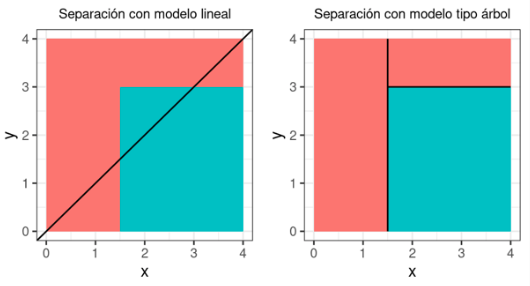